<a id='intro'></a>
## Introduction


>
> The dataset that I have selected to explore is movie data from The Movie Database (TMDb). This dataset contains information about 10,000 movies, from budgets and revenues to cast members and directors. I plan on exploring this dataset to answer a few different questions:
- What trends do we see in film revenues over time?
- What percentage of movies actually make back their budgets?
- How influential is genre in a movie being commercially successful?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_films = pd.read_csv('tmdb_movies.csv')
df_films.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [3]:
# Let's get some info about our dataset
df_films.shape

(10866, 21)

So we have 21 columns, and 10,866 rows in this dataset. But we'd like to have a bit more information.

In [4]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df_films.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


OK, so now that we have an idea of our starting point, we're going to do some cleanup to make this dataset a little easier to understand and navigate. Judging from our info, the dataframe has many rows that have null values in them.

In [6]:
#find rows with missing values
df_films.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Immediately the "homepage" column stands out, with almost 8000 missing values. That's about 75% of the dataset, so it's unlikely we'd be able to use that column in any meaningful way. and if we just removed all of those rows with null values, we'd be drastically reducing our sample size. The missing data can be attributed to the fact that many of these movies were made before the rise of widespread internet usage, so of course they wouldn't have a homepage. Let's drop that column.

In [8]:
#dropping "homepage" column
df_films.drop(['homepage'], axis=1, inplace=True)
df_films.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


Actually, looking at those other rows with missing values, I think it would be best if we just dropped those as well. I think we'll still be able to do most of the significant analysis without those rows.

In [9]:
df_films.dropna(inplace=True)
df_films.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Let's see how the dataset is looking now:

In [10]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 10865
Data columns (total 20 columns):
id                      7031 non-null int64
imdb_id                 7031 non-null object
popularity              7031 non-null float64
budget                  7031 non-null int64
revenue                 7031 non-null int64
original_title          7031 non-null object
cast                    7031 non-null object
director                7031 non-null object
tagline                 7031 non-null object
keywords                7031 non-null object
overview                7031 non-null object
runtime                 7031 non-null int64
genres                  7031 non-null object
production_companies    7031 non-null object
release_date            7031 non-null object
vote_count              7031 non-null int64
vote_average            7031 non-null float64
release_year            7031 non-null int64
budget_adj              7031 non-null float64
revenue_adj             7031 non-null fl

That's starting to look a bit better, let's check to see if there are any duplicates in the dataset, and remove any that we find.

In [11]:
#print number of duplicates
print (df_films.duplicated().sum())

1


In [12]:
#drop the duplicated data
df_films.drop_duplicates(inplace=True)

Now we'll check to make sure the duplicates are gone

In [13]:
#print number of duplicates
print (df_films.duplicated().sum())

0


In [14]:
#saving cleaned dataset
df_films.to_csv('films_clean_v1.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis




In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_1 = pd.read_csv('films_clean_v1.csv')
df_1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


So now that we have our data cleaned up a bit, let's ask some questions.

### What trends do we see in film revenues over time?

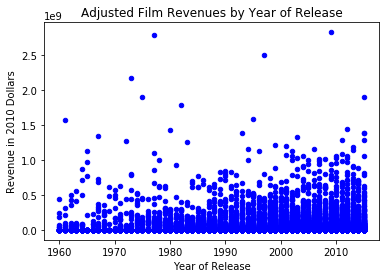

In [16]:
#Use release_year column vs. revenue_adj to plot revenue trends
df_1.plot(kind='scatter', x='release_year', y='revenue_adj', color= 'blue')
plt.title('Adjusted Film Revenues by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Revenue in 2010 Dollars')
plt.show()

From the scatter plot above, we can see that revenue of films has increased over the years.

### What percentage of movies actually make back their budgets?

In [17]:
#Make new column for profitability: Revenue minus budget
df_1['profitability'] = (df_1['revenue_adj'] - df_1['budget_adj'])
df_1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitability
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


In [18]:
#check for new column
df_1['prof_flag'] = (df_1['profitability'] > 0)
df_1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitability,prof_flag
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,True


In [19]:
#Now let's see the numbers: what are the counts of Profitable vs. Not Profitable films.
prof_flag = df_1.prof_flag.value_counts()
prof_flag

False    3728
True     3302
Name: prof_flag, dtype: int64

In [20]:
#The counts expressed as a percentage of the total.
df_1.prof_flag.value_counts('False')

False    0.530299
True     0.469701
Name: prof_flag, dtype: float64

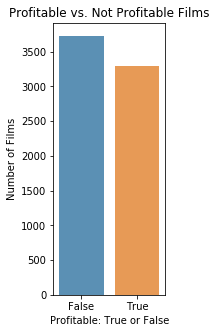

In [21]:
#Create bar chart to show comparison between number of profitable vs. not profitable films
plt.figure(figsize=(2,5))
sns.barplot(prof_flag.index, prof_flag.values, alpha=0.8)
plt.title('Profitable vs. Not Profitable Films')
plt.xlabel('Profitable: True or False')
plt.ylabel('Number of Films')
plt.show()


As we can see by the graph above, films are less likely to be profitable than not profitable, though it's close to a 50/50 split.

### How does genre influence movie financial success?

In [22]:
#Assume that the first genre in the pipe delimited column
    #is the main genre of the film, add column for main genres
    
df_1['main_genre'] = df_1['genres'].str.split('|').str[0]
df_1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitability,prof_flag,main_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,True,Action


In [23]:
df_1.main_genre.value_counts()

Comedy             1526
Drama              1509
Action             1148
Horror              643
Adventure           444
Thriller            350
Crime               286
Fantasy             196
Animation           195
Science Fiction     150
Documentary         133
Romance             105
Mystery              87
Family               74
Music                53
War                  41
Western              33
History              27
TV Movie             27
Foreign               3
Name: main_genre, dtype: int64

In [24]:
#going to take this opportunity to save a new copy of the .csv file
df_1.to_csv('films_clean_v2.csv', index=False)

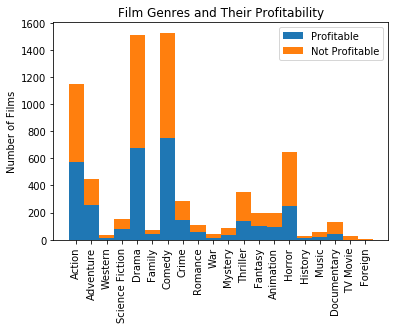

In [25]:
#split our question into two parts, popularity and profitability.
    #start with profitability - which genres are more profitable?
    #Build stacked bar chart of True/False prof_flag by genre
    

data = df_1

movie_genres = list(data['main_genre'].unique())
true_count = []
false_count = []
ind = np.arange(len(movie_genres))

for genre in movie_genres:
    true_count.append(len(data[(data['main_genre']==genre) & (data['prof_flag']==True)]))
    false_count.append(len(data[(data['main_genre']==genre) & (data['prof_flag']==False)]))

movie_genres = tuple(movie_genres)
true_count = tuple(true_count)
false_count = tuple(false_count)

p1 = plt.bar(ind, true_count, 1)
p2 = plt.bar(ind, false_count, 1, bottom=true_count)

plt.ylabel('Number of Films')
plt.title('Film Genres and Their Profitability')
plt.xticks(ind, movie_genres, rotation = 90)
plt.legend((p1[0], p2[0]), ('Profitable', 'Not Profitable'))

plt.show()

Looking at this graph, it looks to be a fairly even split for most genres between profitable and not. Foreign films, TV Movies, and Documentaries look to be more unprofitable than the average, but on the whole the genre of a film doesn't seem to be a major factor in how profitable it is.

Now that we have this data together, I'm kind of curious about the percieved success of a few specific films. So I'm going to build a function that would let me find these films quickly.

In [26]:
# writing a function to return the profitability and popularity of an entered film name
def film_search(title):
    if title in list(df_1['original_title']):
        movie = df_1[df_1['original_title']==title]
        return movie['prof_flag'], movie['popularity']
    else:
        return "Film not found"

In [27]:
film_search('Jurassic Park')

(6520    True
 Name: prof_flag, dtype: bool, 6520    2.204926
 Name: popularity, dtype: float64)

In [28]:
film_search('Toy Story')

(4871    True
 Name: prof_flag, dtype: bool, 4871    4.282462
 Name: popularity, dtype: float64)

In [29]:
film_search('Jaws')

(6178    True
 Name: prof_flag, dtype: bool, 6178    2.563191
 Name: popularity, dtype: float64)

That function helps a lot to find those films easily!

<a id='conclusions'></a>
## Conclusions



Overall, I was able to see some interesting things using this dataset, and I think this work is just scratching the surface. I chose to focus on the financial aspect of the film industry. After importing and cleaning the data, I found some interesting trends:

- Adjusted film revenues seem to have risen on average over the past 60 years based on the scatter plot I created using the data, as we're seeing a higher concentration of films at higher revenue points now than we did in the 1960s. We may also just be making more movies now, so that could be another area to explore to see if that is influencing the numbers.
- Overall, films seem to be more likely to not be profitable, but it is close to a 50/50 split. This profitability was determined using the adjusted budgets and adjusted revenues of the films in our dataset. 
- Interestingly, the genre of a film does not seem to have a large influence on profitability. When we graphed the profitable films against the not profitable ones, most of the genres seemed to have a similar proportion. There may be some minor fluctuations based on genre that we could uncover with a deeper dive though.

### Limitations

When cleaning the data, I found that there were a lot of films without a homepage, due to the long time window in the dataset. By dropping that column, I was able to eliminate a lot of null values from the dataset, but it eliminated the opportunity for me to do any analysis on the data using that homepage data that we did have.

In the analysis of profitability by genre, I was only able to examine the first genre named for each film. Many of the films listed multiple genres, but due to the structure of the data it was difficult to analyze the profitability using all of the genres attached to each film. I assumed that the first genre was the main genre, so I used that for my analysis. However, it is possible that by including the subgenres in the analysis that we might find different results when analyzing trends relating to the genre of the films.

The data we were provided is a limitation to the analysis that we can do:
- For example, we have no confirmation of what criteria TMBD uses in order for what films are in this database. It's possible that there are films produced by certain directors or certain studios are not included in the data, simply because those films didn't meet the database criteria.
- While the revenues were adjusted for inflation, there was no indication whether they were strictly domestic revenues or whether international revenues were included. If international revenues were included, how were exchange rates in the currencies normalized? Not having this answer is a limitation.
- The popularity number is arbitrary to us. We don't know what that number is based off of, so it's hard to do any meaningful analysis using it.




